# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
#def P1(num_examples=5):
### STUDENT START ###
for x in range(5):
    print("Label:", train_labels[x], "-", newsgroups_train.target_names[int(train_labels[x])])
    print("Message:", train_data[x])
    print("")
### STUDENT END ###
#P1()

Label: 1 - comp.graphics
Message: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Label: 3 - talk.religion.misc
Message: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
fo

### Part 2:

Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
#def P2():
### STUDENT START ###
# Turns the training data into feature vectors, default parameters
CV = CountVectorizer()
train_fit = CV.fit_transform(train_data)
# Exmaining the default vocabulary formed by countvectorizer - a
print("The size of the training data vocabulary is:", train_fit.shape[1])
print("Average number of non-zero per example:", round(train_fit.nnz / len(train_data), 3))
print("Percentage of non-zeros to total is:", round((train_fit.nnz / np.size(train_fit.toarray())) * 100, 3))
print("")
# Prints first and last feature string - b
print("First and last feature strings:", [CV.get_feature_names()[i] for i in (0, -1)])
print("")
# Adding customer vocabulary - c
my_vocab = ["atheism", "graphics", "space", "religion"]
vocab_CV = CountVectorizer(vocabulary=my_vocab)
vocab_fit = vocab_CV.fit_transform(train_data)
print("Custom vocabulary matrix shape:", vocab_fit.shape)
print("Average number of non-zeros per example, defined vocabulary:", round(vocab_fit.nnz / len(train_data), 3))
print("")
# Testing bigram and trigram features - d
bigram_CV = CountVectorizer(analyzer="word", ngram_range=(2,2))
bigram_fit = bigram_CV.fit_transform(train_data)
print("Bigram vocabulary size:", bigram_fit.shape[1])
trigram_CV = CountVectorizer(analyzer="word", ngram_range=(3,3))
trigram_fit = trigram_CV.fit_transform(train_data)
print("Trigram vocabulary size:", trigram_fit.shape[1])
print("")
# Restricting types of words added to vocabulary based on frequency - e
min_CV = CountVectorizer(min_df = 10)
min_fit = min_CV.fit_transform(train_data)
print("Vocabulary size using 'min_df':", min_fit.shape[1])
print("")
# Comparing train_data with dev_data - f
dev_fit = CV.fit_transform(dev_data)
print("Percentage vocabulary missing in dev vocabulary:", 
      round(100 * (train_fit.shape[1] - dev_fit.shape[1]) / train_fit.shape[1], 3))
### STUDENT END ###
#P2()

The size of the training data vocabulary is: 26879
Average number of non-zero per example: 96.706
Percentage of non-zeros to total is: 0.36

First and last feature strings: ['00', 'zyxel']

Custom vocabulary matrix shape: (2034, 4)
Average number of non-zeros per example, defined vocabulary: 0.268

Bigram vocabulary size: 194891
Trigram vocabulary size: 315692

Vocabulary size using 'min_df': 3064

Percentage vocabulary missing in dev vocabulary: 39.559


### Part 3:

Use the default CountVectorizer options and report the f1 score (use metrics.f1_score with average="weighted") for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

* Why doesn't nearest neighbors work well for this problem?
* Any ideas why logistic regression doesn't work as well as Naive Bayes?
* Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

The k that gives the best f1-score is 97
The f1-score for k-Nearest Neighbors is: 0.4642
The alpha with the best f1-score is 0.1
The f1-score for Multinominal Naive Bayes is: 0.7903
The C with the best f1-score is 0.1
The f1-score for Logistic Regression is: 0.6971

Sum of squared weights for each class:


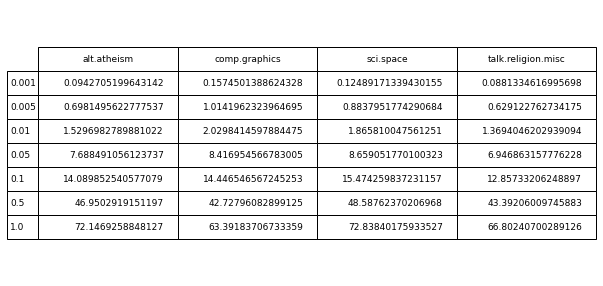

In [5]:
#def P3():
### STUDENT START ###
# Setting default parameters for CountVectorizer
CountVect = CountVectorizer()
CountVect_train = CountVect.fit_transform(train_data)
CV_dev = CountVect.transform(dev_data)

# k-Nearest Neighbors model
k_results = []
for k in range(1, 100, 2):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(CountVect_train, train_labels)
    kNN_predict = kNN.predict(CV_dev)
    kNN_f1 = metrics.f1_score(dev_labels, kNN_predict, average='weighted')
    k_results.append(kNN_f1)
best_k = k_results.index(max(k_results))
print("The k that gives the best f1-score is", best_k * 2 + 1 )
print("The f1-score for k-Nearest Neighbors is:", round(max(k_results), 4))

# Multinomial Naive Bayes model
alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
a_results = []
for a in alpha:
    MNNB = MultinomialNB(alpha=a)
    MNNB.fit(CountVect_train, train_labels)
    MNNB_pred = MNNB.predict(CV_dev)
    MNNB_f1 = metrics.f1_score(dev_labels, MNNB_pred, average='weighted')
    a_results.append(MNNB_f1)
best_a = a_results.index(max(a_results))
print("The alpha with the best f1-score is", alpha[best_a])
print("The f1-score for Multinominal Naive Bayes is:", round(max(a_results), 4))

# # # Logistic Regression Model - 'l2' regularization
c_value = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
c_results = []
sum_square = []
for c_num in c_value:
    LogReg = LogisticRegression(C=c_num, max_iter=400, penalty = 'l2')   # max_iter is set due to getting error on default
    LogReg.fit(CountVect_train, train_labels)
    LogReg_pred = LogReg.predict(CV_dev)
    LogReg_f1 = metrics.f1_score(dev_labels, LogReg_pred, average='weighted')
    c_results.append(LogReg_f1)
    square_results = np.square(LogReg.coef_)
    sum_results = np.sum(square_results, axis=1)
    sum_square.append(sum_results)
best_c = c_results.index(max(c_results))
print("The C with the best f1-score is", str(c_value[best_c]))
print("The f1-score for Logistic Regression is:", round(max(c_results), 4))
print("")
print("Sum of squared weights for each class:")
sum_stack = np.stack(sum_square, axis=0)
# Making table of sum of squared weights
plt.figure(figsize=(5,5))
table = plt.table(cellText = sum_stack, colLabels = newsgroups_train.target_names,
                 rowLabels = c_value, loc='center')
table.scale(2,2)
plt.axis("off")
plt.grid(False)
plt.show()
### STUDENT END ###
#P3()

ANSWER: 
+ Nearest Neighbors (kNN) doesn't work well in this situtation because kNN works based on proximity of the features. Without preprocessing the raw data, there will be a lot of words shared between the labels so kNN will have a tough time deciding which features do to which labels to make a decision.
+ Logistic Regression doesn't work as well as naive bayes (NB) in this case due to the size of the training set. Generative models (NB) tend to asymptotic faster than discrimative model (Logististic Regression) but as the training size goes to infinity, the discrimative model tends to preform better. Also NB has a higher bias and lower variance compared to Logistic Regression, so if the data tends the follow the same trend then the NB model will perform better. 
+ Based off of the sum of squared weights calculated for each iteration of C (regulatization), as the strength of C weakens the sum of squared weights becomes larger.

### Part 4:

Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

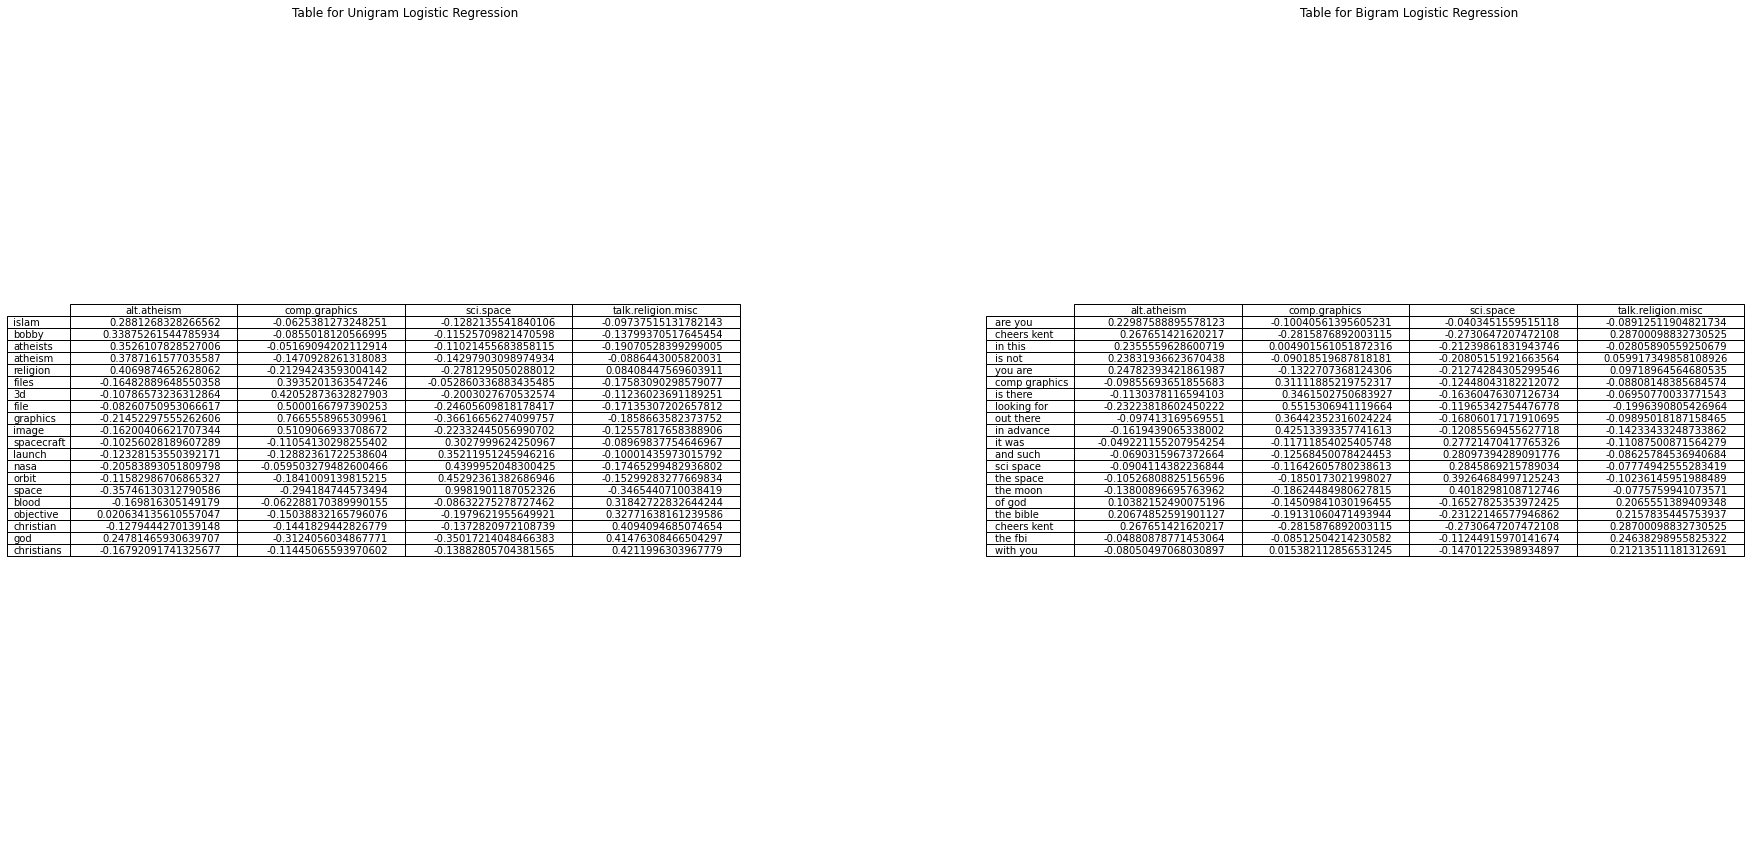

In [6]:
#def P4():
### STUDENT START ###
# Transforming the raw data into tokens - default parameters
CV = CountVectorizer()
CV_train = CV.fit_transform(train_data)
# Bigram parameters for CountVectorizer
bigram_CV = CountVectorizer(analyzer='word', ngram_range=(2,2))
bigram_train = bigram_CV.fit_transform(train_data)

# Logistic Regression model - default CV
LR = LogisticRegression(C=0.1, max_iter=400)
LR.fit(CV_train, train_labels)
# Finding largest weights for each feature
max_post = []
for i in range(LR.coef_.shape[0]):
    temp_list = np.argpartition(LR.coef_[i], -5)[-5:]
    max_post.extend(temp_list)

feature_uni = CV.get_feature_names()
# Combines the max probabilites into a matrix
uni_matrix = np.column_stack((np.take(LR.coef_[0], max_post), np.take(LR.coef_[1], max_post),
                            np.take(LR.coef_[2], max_post), np.take(LR.coef_[3], max_post)))

# Bigram - Logistic Regression model
bigram_LR = LogisticRegression(C=0.1, max_iter=400)
bigram_LR.fit(bigram_train, train_labels)
# Weights for each feature bigram model
max_bigram = []
for i in range(bigram_LR.coef_.shape[0]):
    temp_list = np.argpartition(bigram_LR.coef_[i], -5)[-5:]
    max_bigram.extend(temp_list)

feature_bigram = bigram_CV.get_feature_names()
# Combines max probabilites for bigram into matrix
bigram_matrix = np.column_stack((np.take(bigram_LR.coef_[0], max_bigram), np.take(bigram_LR.coef_[1], max_bigram),
                            np.take(bigram_LR.coef_[2], max_bigram), np.take(bigram_LR.coef_[3], max_bigram)))

# Displaying tables for results for unigram and bigram
fig,axes = plt.subplots(1,2, figsize=(30,15))
axes[0].table(cellText = uni_matrix, colLabels = newsgroups_train.target_names,
                 rowLabels = np.take(feature_uni, max_post), loc='center')
axes[0].set_title("Table for Unigram Logistic Regression")
axes[0].axis('off')
axes[0].grid(False)
axes[1].table(cellText = bigram_matrix, colLabels = newsgroups_train.target_names,
                 rowLabels = np.take(feature_bigram, max_bigram), loc='center')
axes[1].set_title("Table for Bigram Logistic Regression")
axes[1].axis('off')
axes[1].grid(False)
plt.subplots_adjust(wspace=0.5, hspace=0)
plt.show()
### STUDENT END ###
#P4()

ANSWER:

A lot of the features for the bigram table don't seem like they would be distinct to a specifc topic. For example, 'are you' is a feature for alt.atheism and 'looking for' is a feature for comp.graphics. 

### Part 5:

Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [7]:
#def empty_preprocessor(s):
#    return s

#def better_preprocessor(s):
### STUDENT START ###
# Default CountVectorizer to compare the change
CV = CountVectorizer()
CV_train = CV.fit_transform(train_data)
CV_dev = CV.transform(dev_data)
print("The size of the training data vocabulary is:", CV_train.shape[1])

LR = LogisticRegression(C=0.1, max_iter=400, penalty = 'l2')
LR.fit(CV_train, train_labels)
LR_pred = LR.predict(CV_dev)

LR_f1 = metrics.f1_score(dev_labels, LR_pred, average='weighted')
print("The f1 score for Logistic Regression is:", round(LR_f1, 4))
### STUDENT END ###
print("")
#def P5():
### STUDENT START ###
# Function for preprocessing the data
porter_stemmer = nltk.stem.PorterStemmer()
def text_cleaning(text):
    # Lowercase every word
    text = text.lower()
    # Noise Reducing - Cleaning up words
    text = re.sub("\\W|\\d", " ", text)   # Removing digits and non-ascii characters
    # White space removeal
    text=text.strip()
    # Stop word removal
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = re.split("\\s+",text)
    filt_text = [w for w in words if not w in stop_words] 
    # Stemming words
    stem_words = [porter_stemmer.stem(word=word) for word in filt_text]
    stem_text = " ".join(stem_words)
    
    return stem_text
                      
# Preprocessed training data
pre_CV = CountVectorizer(preprocessor=text_cleaning)
pre_train = pre_CV.fit_transform(train_data)
pre_dev = pre_CV.transform(dev_data)
print("The size of the preprocessed training data vocabulary is:", pre_train.shape[1])

pre_LR = LogisticRegression(C=0.1, max_iter=400, penalty='l2')
pre_LR.fit(pre_train, train_labels)
pre_LR_predict = pre_LR.predict(pre_dev)

pre_LR_f1 = metrics.f1_score(dev_labels, pre_LR_predict, average='weighted')
print("The f1 score for the preprocessed Logistic Regression is:", round(pre_LR_f1, 4))

print("")
print("The difference in vocabulary size is:", CV_train.shape[1] - pre_train.shape[1])
print("f1-score increased by:", round(pre_LR_f1 - LR_f1, 4))
### STUDENT END ###
#P5()

The size of the training data vocabulary is: 26879
The f1 score for Logistic Regression is: 0.6971

The size of the preprocessed training data vocabulary is: 17137
The f1 score for the preprocessed Logistic Regression is: 0.7136

The difference in vocabulary size is: 9742
f1-score increased by: 0.0165


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

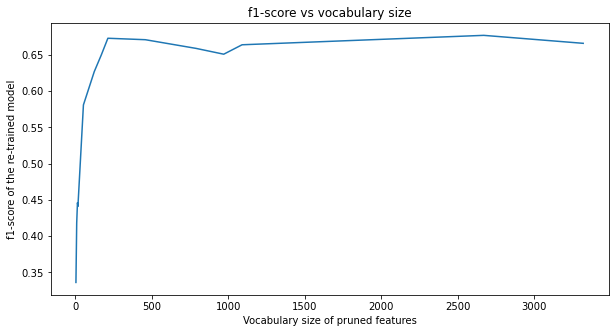

In [8]:
#def P6():
    # Keep this random seed here to make comparison easier.
np.random.seed(0)

    ### STUDENT START ###
CV = CountVectorizer()
train_CV = CV.fit_transform(train_data)
dev_CV = CV.transform(dev_data)

f1_scores_l2 = []
vocab_size = []
C_list = [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0, 5.0, 10.0]
for c_value in C_list:
    l1_LR = LogisticRegression(C=c_value, max_iter=500, penalty='l1', solver='liblinear', tol = 0.015)
    l1_LR.fit(train_CV, train_labels)
    l1_LR_predict = l1_LR.predict(dev_CV)

    non_zero_matrix = l1_LR.coef_ != 0    # Checks which feature contains zero weights
    nz_postition = non_zero_matrix.any(axis=0)    # Takes the features that has non_zero weights
    # Selecting the features that are only non-zero
    train_trim = train_CV[:, nz_postition]
    dev_trim = dev_CV[:, nz_postition]

    l2_LR = LogisticRegression(C=c_value, max_iter=500, penalty="l2", tol=0.015)
    l2_LR.fit(train_trim, train_labels)
    l2_LR_predict = l2_LR.predict(dev_trim)

    l2_f1 = round(metrics.f1_score(dev_labels, l2_LR_predict, average='weighted'), 3)
    f1_scores_l2.append(l2_f1)
    vocab_size.append(train_trim.shape[1])
    
# Graph of accuracy vs vocabulary size for different C
plt.figure(figsize=(10,5))
plt.plot(vocab_size, f1_scores_l2)
plt.xlabel("Vocabulary size of pruned features")
plt.ylabel("f1-score of the re-trained model")
plt.title("f1-score vs vocabulary size")
plt.show()
    ### STUDENT END ###
#P6()

### Part 7:

Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [9]:
#def P7():
### STUDENT START ###
# Setting the TfidVectorizer with default settings
TV = TfidfVectorizer()
train_TV = TV.fit_transform(train_data)
dev_TV = TV.transform(dev_data)

TV_LR = LogisticRegression(C=100, max_iter=400)
TV_LR.fit(train_TV, train_labels)
TV_predict = TV_LR.predict(dev_TV)
print("f1 score using TfidfVectorizer:", 
      round(metrics.f1_score(dev_labels, TV_predict, average='weighted'), 4))
print("Vocabulary size:", train_TV.shape[1])
# Obtaining the max predicted probabilities
prob_dev = TV_LR.predict_proba(dev_TV)
max_prob = prob_dev.max(axis=1)
# Obtaining the predicted probabilty of the correct label
correct_prob_dev = np.array([prob_dev[x,y] for x,y in zip(range(len(dev_labels)),dev_labels)])

# R = maximum predicted probabilty / predicted probabilty of the correct label
R = max_prob / correct_prob_dev
max_R = np.argpartition(R, -3)[-3:]    # Index position of the highest R
print("")
# Outputting the 3 documents with the highest R
x = 1
for doc in max_R:
    print("Document", x)
    print("Correct Label:", newsgroups_train.target_names[dev_labels[doc]])
    print(dev_data[doc])
    print("")
    x += 1
    
# Confusion matrix to see where the mistakes happen
print("Confusion matrix:")
print(confusion_matrix(dev_labels, TV_predict, labels=[0, 1, 2, 3]))
## STUDENT END ###
#P7()

f1 score using TfidfVectorizer: 0.768
Vocabulary size: 26879

Document 1
Correct Label: talk.religion.misc
Why is the NT tossed out as info on Jesus.  I realize it is normally tossed
out because it contains miracles, but what are the other reasons?

MAC
--
****************************************************************
                                                    Michael A. Cobb
 "...and I won't raise taxes on the middle     University of Illinois
    class to pay for my programs."                 Champaign-Urbana
          -Bill Clinton 3rd Debate             cobb@alexia.lis.uiuc.edu

Document 2
Correct Label: talk.religion.misc
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), an

ANSWER:
+ TfidfVectorizer is shown to be more accurate than CountVectorizer. This is due to TfidfVectorizer putting less weight on common words between all of the document types.
+ The model tends to confuse religious talk with atheism as both are have high incorrect predictions, as shown in the confusion matrix at the end of the print out. This is understandable since the vocabulary between the two document type are probabilty similar. The model also tends to confuse science type documents with atheism. This can be addressed by excluding common words between the two document types so that each have more unique features to distinguish between both.

### Part 8 EXTRA CREDIT:

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.